In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# load the data
df = pd.read_csv('/home/sunbeam/Documents/ML/ml-o-02-data/ML-02-master/day10/heart_disease.csv')

In [36]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [37]:
df.info

<bound method DataFrame.info of      age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  target  
0        0   0     1    

In [38]:
df.describe()

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [39]:
# find x and y
x = df.drop(['target'], axis=1)
y = df['target']

In [40]:
import seaborn as sns
# sns.pairplot(df)

In [57]:
# split the data into train test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=123455677)
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [58]:
model.score(x_test, y_test)

0.9180327868852459

In [59]:
y_predictions = model.predict(x_test)
y_predictions

array([0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1])

In [60]:
# evaluation metrics
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, classification_report
classification_report(y_test, y_predictions)

'              precision    recall  f1-score   support\n\n           0       0.96      0.85      0.90        26\n           1       0.89      0.97      0.93        35\n\n    accuracy                           0.92        61\n   macro avg       0.93      0.91      0.91        61\nweighted avg       0.92      0.92      0.92        61\n'

In [61]:
cm = confusion_matrix(y_test, y_predictions)
cm

array([[22,  4],
       [ 1, 34]])

In [62]:
tn = cm[0][0]
fp = cm[0][1]
fn = cm[1][0]
tp = cm[1][1]
accuracy = (tn + tp) / cm.sum()
accuracy_sk = accuracy_score(y_test, y_predictions)
print(f"accuracy = {accuracy * 100: 0.2f}% and {accuracy_sk * 100 :0.2f}%")

accuracy =  91.80% and 91.80%


In [63]:
mis_classification_rate = (fp + fn) / (tn + fp + fn + tp)
print(f"mis-classification rate = {mis_classification_rate * 100: 0.2f} %")

mis-classification rate =  8.20 %


In [64]:
recall = tp / (tp + fn)
recall_sk = recall_score(y_test, y_predictions)
print(f"recall = {recall * 100: 0.2f}% and {recall_sk * 100: 0.2f}%")

recall =  97.14% and  97.14%


In [65]:
fpr = fp / (fp + tn)
print(f"fpr = {fpr * 100: 0.2f}%")

fpr =  15.38%


In [66]:
specificity = tn / (tn + fp)
print(f"specificity = {specificity * 100: 0.2f}%")

specificity =  84.62%


In [67]:
precision = tp / (fp + tp)
print(f"precision = {precision * 100: 0.2f}%")

precision =  89.47%


In [68]:
f1_score_mine = 2 * ((precision * recall) / (precision + recall))
f1_score_sk = f1_score(y_test, y_predictions)
print(f"f1 score = {f1_score_mine :0.2f} and {f1_score_sk :0.2f}")

f1 score = 0.93 and 0.93


threshold = [2 1 0]


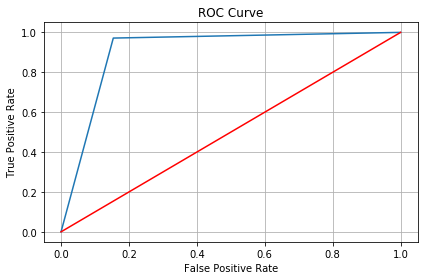

In [69]:
# ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, threshold = roc_curve(y_test, y_predictions)
print(f"threshold = {threshold}")

plt.plot (fpr, tpr)
plt.plot([0, 1], [0, 1], color="red")
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC Curve')
plt.tight_layout()
plt.grid()

plt.savefig('roc_1.png')
plt.show()